In [1]:
import pandas as pd
import numpy as np

# 데이터

In [2]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')
sample_submission = pd.read_csv('./dataset/sample_submission.csv')

# EDA

## train

In [3]:
train.head(2)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800


In [4]:
train.drop(columns='id', inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [6]:
# null features
x = train.isnull().sum()
x[x != 0]

Sex                  3
Delta 15 N (o/oo)    3
Delta 13 C (o/oo)    3
dtype: int64

In [7]:
train.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


## test

In [8]:
test.head(2)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   228 non-null    int64  
 1   Species              228 non-null    object 
 2   Island               228 non-null    object 
 3   Clutch Completion    228 non-null    object 
 4   Culmen Length (mm)   228 non-null    float64
 5   Culmen Depth (mm)    228 non-null    float64
 6   Flipper Length (mm)  228 non-null    float64
 7   Sex                  222 non-null    object 
 8   Delta 15 N (o/oo)    219 non-null    float64
 9   Delta 13 C (o/oo)    220 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 17.9+ KB


In [10]:
# null features
x = test.isnull().sum()
x[x != 0]

Sex                  6
Delta 15 N (o/oo)    9
Delta 13 C (o/oo)    8
dtype: int64

## Features

### Species

In [11]:
train['Species'].value_counts()

Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64

In [12]:
train.groupby('Species')['Body Mass (g)'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),41.0,3801.219512,435.601281,3000.0,3475.0,3750.0,4100.0,4725.0
Chinstrap penguin (Pygoscelis antarctica),25.0,3756.000000,419.155898,2700.0,3500.0,3675.0,3950.0,4550.0
Gentoo penguin (Pygoscelis papua),48.0,5075.520833,481.036381,4150.0,4700.0,5000.0,5500.0,6300.0


### Island

In [13]:
train['Island'].value_counts()

Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64

In [14]:
train.groupby('Island')['Body Mass (g)'].describe()

,count,mean,std,min,25%,50%,75%,max
Island,,,,,,,,
Biscoe,57.0,4878.947368,664.145354,3075.0,4575.0,4850.0,5350.0,6300.0
Dream,44.0,3764.772727,432.183416,2700.0,3450.0,3700.0,3987.5,4650.0
Torgersen,13.0,3817.307692,373.940812,3275.0,3600.0,3700.0,3900.0,4700.0


### Clutch Completion

In [15]:
train['Clutch Completion'].value_counts()

Yes    102
No      12
Name: Clutch Completion, dtype: int64

In [16]:
train.groupby('Clutch Completion')['Body Mass (g)'].describe()

,count,mean,std,min,25%,50%,75%,max
Clutch Completion,,,,,,,,
No,12.0,4116.666667,890.692614,2700.0,3475.00,4025.0,4537.5,5700.0
Yes,102.0,4352.696078,769.055828,3000.0,3681.25,4275.0,4887.5,6300.0


### Sex

In [17]:
train['Sex'].value_counts()

MALE      56
FEMALE    55
Name: Sex, dtype: int64

In [18]:
train.groupby('Sex')['Body Mass (g)'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
FEMALE,55.0,4000.909091,654.877774,2700.0,3475.0,3750.0,4700.0,5200.0
MALE,56.0,4659.821429,774.767980,3250.0,3950.0,4575.0,5362.5,6300.0


### Continuos correlation

In [19]:
train.corr()['Body Mass (g)']

Culmen Length (mm)     0.572063
Culmen Depth (mm)     -0.490643
Flipper Length (mm)    0.864814
Delta 15 N (o/oo)     -0.548678
Delta 13 C (o/oo)     -0.468425
Body Mass (g)          1.000000
Name: Body Mass (g), dtype: float64

In [20]:
numeric_cols = list(train.corr()['Body Mass (g)'].keys())[:-1]

In [21]:
numeric_cols

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

#### scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

### object variable

In [24]:
train = pd.get_dummies(train, columns=['Species', 'Island', 'Sex'])

In [25]:
train['Clutch Completion'] = train['Clutch Completion'].eq('Yes').mul(1)

### fill na

In [32]:
train.fillna(0, inplace=True)

## test preprocessing

In [29]:
test = pd.get_dummies(test, columns=['Species', 'Island', 'Sex'])
test['Clutch Completion'] = test['Clutch Completion'].eq('Yes').mul(1)
numeric_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
test[numeric_cols] = scaler.fit_transform(test[numeric_cols])
test.fillna(0, inplace=True)

In [34]:
test

,id,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,0,1,1.533232,1.751161,0.744723,1.288186,1.296887,0,1,0,0,1,0,0,1
1,1,1,2.243089,-0.110330,2.064958,-0.771598,-0.905400,0,0,1,1,0,0,0,1
2,2,1,-0.851157,0.795260,-0.722204,-0.665708,-0.585894,1,0,0,0,1,0,1,0
3,3,1,0.295534,-0.311572,-0.648858,1.641601,1.157827,0,1,0,0,1,0,1,0
4,4,0,-1.033172,0.694639,-2.042439,-0.638702,0.619036,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,223,1,1.041793,1.348676,0.231298,2.128226,1.414621,0,1,0,0,1,0,0,1
224,224,1,0.532153,-1.217163,1.258148,-0.269245,-1.220144,0,0,1,1,0,0,1,0
225,225,1,0.532153,-1.871200,0.744723,-1.353848,0.447691,0,0,1,1,0,0,1,0
226,226,1,1.260211,1.197745,0.084606,1.977025,1.237539,0,1,0,0,1,0,0,1


# model

## Ridge

### 1

In [37]:
label = train['Body Mass (g)']
train.drop(columns='Body Mass (g)', inplace=True)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, train, label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))    

alpha 값  0 일때 평균 rmse : 340.297
alpha 값  0.1 일때 평균 rmse : 337.3938
alpha 값  1 일때 평균 rmse : 330.0504
alpha 값  10 일때 평균 rmse : 327.8767
alpha 값  100 일때 평균 rmse : 404.7959


In [40]:
from datetime import datetime

In [48]:
ridge = Ridge(alpha = 10)
ridge.fit(train, label)
sample_submission['Body Mass (g)'] = ridge.predict(test.iloc[:, 1:])
sample_submission.to_csv('./penguin_result_{}.csv'.format(datetime.now().strftime('%Y%m%d%H%M')), index=False)

### 2

In [ ]:
x_train, y_train = label

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, train, label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))    

In [78]:
train

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,1,1.016685,-0.887255,1.161653,-0.765275,0.622594,0,0,1,1,0,0,0,1
1,0,0.922318,1.027037,-0.209242,1.580340,1.607903,0,1,0,0,1,0,0,1
2,1,0.091884,-1.352893,0.476205,-0.385968,-1.513591,0,0,1,1,0,0,1,0
3,1,-0.021357,-1.197680,0.750384,-0.949461,-0.516633,0,0,1,1,0,0,1,0
4,0,0.941191,-0.525091,1.504376,-0.627096,-1.308170,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,-1.512363,0.406186,-1.237413,0.000000,0.000000,1,0,0,0,0,1,1,0
110,1,-1.021652,0.820087,-0.894689,0.659003,-0.084634,1,0,0,0,1,0,0,1
111,1,-0.266712,0.768349,-0.757600,0.411611,-0.366558,1,0,0,0,1,0,0,1
112,0,0.431607,-0.214666,-0.757600,1.890266,1.151648,0,1,0,0,1,0,1,0


In [77]:
train.filter(regex='Island')

,Island_Biscoe,Island_Dream,Island_Torgersen
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
109,0,0,1
110,0,1,0
111,0,1,0
112,0,1,0


## xgb, LGBM

In [51]:
import xgboost as xgb
from lightgbm import LGBMRegressor

In [59]:
x_train, y_train = train.to_numpy(), label.to_numpy()
x_test = test.iloc[:, 1:].to_numpy()

In [62]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params, cv=5):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=cv)
    grid_model.fit(x_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('최적 평균 RMSE 값:', np.round(rmse, 4))
    print('최적 파라미터:', grid_model.best_params_)
    
    return grid_model.best_estimator_

In [63]:
lgbm_params = {
    'n_estimators':[500, 1000, 1500, 2000], 
    'learning_rate': [0.1, 0.05, 0.01, 0.005], 
    'max_depth': [1,2,3,4]
}

lgbm_reg = LGBMRegressor(max_depth=3, n_estimators=1000)
best_lgbm = get_best_params(lgbm_reg, lgbm_params)

최적 평균 RMSE 값: 326.191
최적 파라미터: {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 1000}


<BarContainer object of 14 artists>

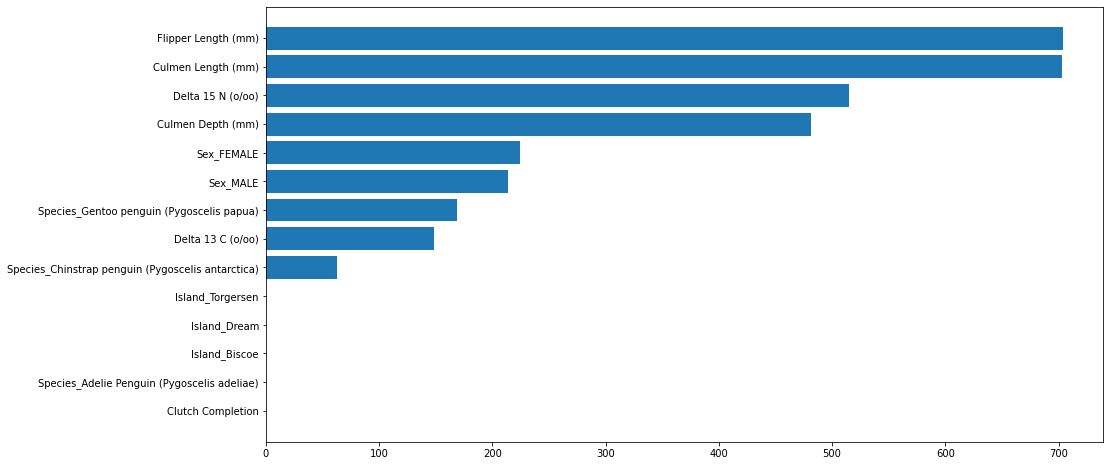

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
sorted_idx = best_lgbm.feature_importances_.argsort()

plt.figure(figsize=(15,8))
plt.barh(train.columns[sorted_idx], best_lgbm.feature_importances_[sorted_idx])